<a href="https://colab.research.google.com/github/Romanchenko-RS/ML/blob/main/%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D1%8F_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B9_%D0%A0%D0%BE%D0%BC%D0%B0%D0%BD%D1%87%D0%B5%D0%BD%D0%BA%D0%BE_%D0%A0_%D0%A1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Получите данные и загрузите их в рабочую среду.**

In [ ]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
import time

In [ ]:
df = fetch_california_housing()

**2. Проведите первичный анализ.**

**a.Проверьте данные на пропуски. Удалите в случае обнаружения.**

In [ ]:
# Переведём датасет во фрейм и сразу назовём его X
X = pd.DataFrame(df.data, columns=df.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# Посмотрим на количество уникальных значений во фрейме
X.nunique()

MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
dtype: int64

In [ ]:
# Статистика по всем столбцам
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
X.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Как видно, пропусков в данных нет.

**b. Нормализуйте один из признаков.**

Произведем минмакс нормализацию для переменной "Population", т.к. диапазон её значений намного больше всех остальных.

In [ ]:
# Проведение минимаксной нормализации
X['Population_normalized'] = (X['Population'] - X['Population'].min()) / (X['Population'].max() - X['Population'].min())
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Population_normalized
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,0.008941
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,0.067210
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,0.013818
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0.015555
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,0.015752


Уберём исходный параметр "Population" из таблицы.

In [ ]:
X = X.drop(['Population'], axis=1)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,Latitude,Longitude,Population_normalized
0,8.3252,41.0,6.984127,1.023810,2.555556,37.88,-122.23,0.008941
1,8.3014,21.0,6.238137,0.971880,2.109842,37.86,-122.22,0.067210
2,7.2574,52.0,8.288136,1.073446,2.802260,37.85,-122.24,0.013818
3,5.6431,52.0,5.817352,1.073059,2.547945,37.85,-122.25,0.015555
4,3.8462,52.0,6.281853,1.081081,2.181467,37.85,-122.25,0.015752


In [ ]:
y = pd.DataFrame(df.target, columns=df.target_names)
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


**3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**4. Обучите модель линейной регрессии на обучающем множестве.**

**5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.**

In [ ]:
model = LinearRegression()

start_time_lr = time.time()
model.fit(x_train, y_train)
end_time_lr = time.time()
elapsed_time_lr = end_time_lr - start_time_lr
print(f'Время выполнения обучения линейной регрессии: {elapsed_time_lr:.4f} секунд')

predictions = model.predict(x_test)

model.predict(x_test)  # получаем массив

test_score_lr = model.score(x_test, y_test)

print(f"score для тестовой выборки: {test_score_lr:.4f} ")

Время выполнения обучения линейной регрессии: 0.0118 секунд
score для тестовой выборки: 0.5758 


In [ ]:
# Создание словаря для записи результатов
results = pd.DataFrame(columns=['Метод', 'Score', 'Время обучения модели'])

In [ ]:
results.loc[len(results)] = ['Линейная регрессия', test_score_lr, elapsed_time_lr]

**6. Обучите дерево решений на обучающем множестве.**

In [ ]:
# Создание и обучение модели регрессии
dtr = DecisionTreeRegressor(random_state=42)
start_time_dt = time.time()
dtr.fit(x_train, y_train)
end_time_dt = time.time()
elapsed_time_dt = end_time_dt - start_time_dt
print(f'Время выполнения обучения дерева решений: {elapsed_time_dt:.4f} секунд')

Время выполнения обучения дерева решений: 0.1999 секунд


In [ ]:
# Предсказание на тестовой выборке
y_pred = dtr.predict(x_test)

In [ ]:
accuracy_dt = dtr.score(x_test, y_test)
print(f'Score для тестовой выборки: {accuracy_dt:.4f}')

Score для тестовой выборки: 0.6242


In [ ]:
results.loc[len(results)] = ['Дерево решений', accuracy_dt, elapsed_time_dt]

Можем заметить, что значение score для дерева решений на тестовой выборке выше, чем при линейной регрессии.

**b. Визуализируйте часть дерева решений.**

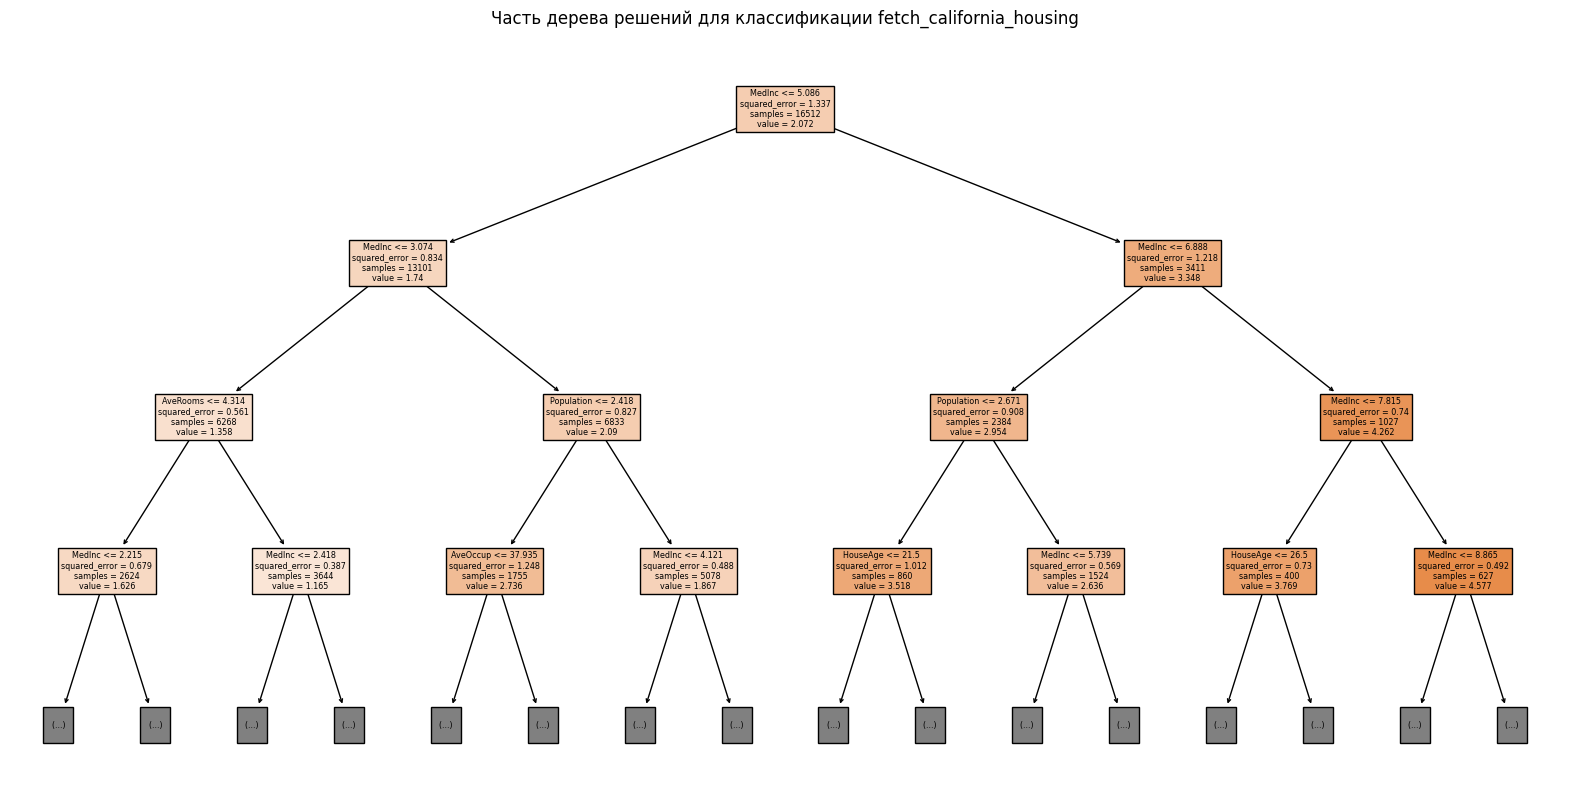

In [ ]:
# Визуализация части дерева решений
plt.figure(figsize=(20,10))
plot_tree(dtr, filled=True,
          feature_names=df.feature_names,
          class_names=df.target_names,
          max_depth=3)  # Ограничение глубины для читаемости
plt.title('Часть дерева решений для классификации fetch_california_housing')
plt.show()

**7. Оптимизируйте глубину дерева (max_depth).**

In [ ]:
# Словарь с параметрами, которые нужно проверить
param_grid = {'max_depth': range(1, 11)}  # Проверяем глубины от 1 до 10

In [ ]:
# Создание модели дерева решений
dtree = DecisionTreeRegressor(random_state=42)

In [ ]:
# Создание GridSearchCV для поиска по сетке с перекрестной проверкой
clf = GridSearchCV(dtree, param_grid, cv=5)  # cv=5 означает 5-кратную перекрестную проверку

In [ ]:
# Создание GridSearchCV для поиска по сетке с перекрестной проверкой
clf = GridSearchCV(dtree, param_grid, cv=5)  # cv=5 означает 5-кратную перекрестную проверку

In [ ]:
# Обучение модели
start_time_dt_op = time.time()
clf.fit(x_train, y_train)
end_time_dt_op = time.time()
elapsed_time_dt_op = end_time_dt_op - start_time_dt_op
print(f'Время выполнения обучения на оптимизированной глубине дерева: {elapsed_time_dt_op:.4f} секунд')


Время выполнения обучения на оптимизированной глубине дерева: 3.8279 секунд


**a. Повторите п. 5 для полученной модели.**

In [ ]:
# Вывод лучшего значения параметра max_depth и соответствующей точности
print(f'Лучшая глубина дерева: {clf.best_params_["max_depth"]}')
print(f'Точность модели с лучшей глубиной: {clf.best_score_:.4f}')

Лучшая глубина дерева: 9
Точность модели с лучшей глубиной: 0.7031


In [ ]:
# Использование лучшей модели для предсказания на тестовой выборке и вычисление точности
best_model = clf.best_estimator_
accuracy_dt_op = best_model.score(x_test, y_test)
print(f'Score на тестовой выборке: {accuracy_dt_op:.4f}')

Score на тестовой выборке: 0.6830


In [ ]:
results.loc[len(results)] = ['Оптимизированное дерево решений', accuracy_dt_op, elapsed_time_dt_op]

**8. Сформулируйте выводы по проделанной работе.**

**a. Сравните точность двух моделей.**

In [ ]:
results

,Метод,Score,Время обучения модели
0,Линейная регрессия,0.575788,0.011795
1,Дерево решений,0.624151,0.199902
2,Оптимизированное дерево решений,0.683020,3.827935


В результате сравнения всех методов можем заметить самую высокую точность у дерева решений м оптимизированной глубиной, однако для данного метода самое высокое время обучения модели.

Для решения данной задачи самым оптимальным вариантом по точности и по расходованию ресурсов является стандартное дерево решений.

**b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?**

Линейная регрессия очень быстро обрабатывает данные, при этом теряя в точности. Можем повысить точность более качественной обработкой данных перед обучением модели, что улучшит точность предсказания. Можем применять для задач, которые не требуют больших вычислительных ресурсов.

Стандартное дерево решений обучается в 17 раз дольше линейной регрессии, при этом даёт большую точность на тех же данных без обработки (прирост в 7.76%). Можем применять на задачах с большим объёмом информации, т.к. затраты ресурсов не глобально возрасли.

Оптимизированное по глубине дерево решений показывает наибольшую точность (прирост в 15,67% от линейной регрессии), но при этом значительно дольше обучается (в 325 раз от линейной регрессии). Можем применять для ответсвенных задач, где требуется наибольшая точность, при этом мы должны располагать значительными вычислительными ресурсами.